# Toy model for UHECR track generation

In [1]:
%matplotlib inline

from generate_sample_frames import *

generated 10 of tracks
displaying a random sample of 10 background frames: 


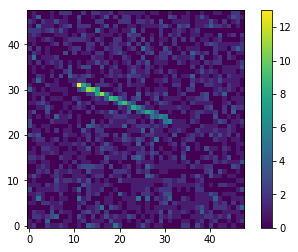

In [2]:
with SampleGenerator() as generator:
    generator.tracks() 

## Fixed definitions

In [ ]:
# frame size
N_ROW = 48
N_COL = 48

# mean background level
MU_BG = 1 # photon/pixel/GTU

# number of frames to be generated
N_FRAME = 10

## Configurable parameters

In [ ]:
# configurable parameter definition for tracks
# start position pixel coordinates
start_pos_min = 5
start_pos_max = 43

# length distribution (Gaussian)
mu_l = 20
sigma_l = 4

# width distribution (Gaussian)
mu_w = 3
sigma_w = 1

# angular distribtution (Uniform)
theta_min = 0
theta_max = 2 * np.pi
phi_min = 0
phi_max = np.pi / 2

# counts distibution (Gaussian)
mu_c = 15
sigma_c = 3

## Set up

In [ ]:
print "Generated", 1 , "frames"

## Background generation
Generate reasonable background frames from a poisson distribution centred on 1 (see: Adams, J.H., Jr et al., 2013. An evaluation of the exposure in nadir observation of the JEM-EUSO mission. Astroparticle Physics, 44, pp.76–90.)

In [ ]:
# sample from poisson to fill background frames
samples = np.random.poisson(mu_bg, N_ROW * N_COL * N_FRAME)
bg_frames = np.reshape(samples, (N_FRAME, N_ROW, N_COL))

# plot first frame to check
plt.imshow(bg_frames[0])
plt.colorbar()

## Track generation
Generate UHECR-like tracks based on a simple toy model 

Parameters describing the track:
* start_position: pixel coordinates of starting position of the track
* length: in pixels
* width: in pixels
* theta: rotation angle (0 - 360 deg)
* phi: incidence angle (0, 45, 90 deg)
* brightness: in counts

In [ ]:
# sample parameters from their distibutions
start_position = np.around(np.random.uniform(start_pos_min, start_pos_max, 2)).astype(int)
length = round(np.random.normal(mu_l, sigma_l, 1))
width = int(round(np.random.normal(mu_w, sigma_w, 1)))
theta = np.random.uniform(theta_min, theta_max, 1)
phi = np.random.uniform(phi_min, phi_max, 1)
counts = round(np.random.normal(mu_c, sigma_c, 1))

# calculate end position
end_position = np.zeros(2)
end_position[0] = start_position[0] + length * np.cos(theta)
if end_position[0] > 45:
    end_position[0] = 45
if end_position[0] < 0:
    end_position[0] = 0
end_position[1] = start_position[1] + length * np.sin(theta)
if end_position[1] > 45:
    end_position[1] = 45 
if end_position[1] < 0:
    end_position[1] = 0
end_position = np.around(end_position).astype(int)

In [ ]:
#draw the line on the frame
from skimage.draw import line_aa
track_frame = np.zeros((48, 48), dtype=np.uint8)


for w in range(1): 
    rr, cc, val = line_aa(start_position[0] + w, start_position[1], end_position[0] + w, end_position[1])
    bright_tmp = counts 
    # give decreasing brightness
    for i in range(len(val)):
        track_frame[rr[i], cc[i]] = val[i] * bright_tmp
        if i%6 == 0:
            bright_tmp = bright_tmp - 1
        if bright_tmp < 0:
            bright_tmp = 0

# add background
samples = np.random.poisson(1, N_ROW*N_COL)
bg_frame = np.reshape(samples, (N_ROW, N_COL))
track_frame = track_frame + bg_frame


#plot to check
plt.imshow(track_frame, origin = "lower")
plt.colorbar()

print 

In [ ]:
# Add thickness and incidence angle
# Tidy into class
# Write out to file for student 

In [ ]:
with SampleGenerator() as generator:
    generator.background() 